In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
df = pd.read_csv('house.csv')


In [6]:
df.head(10)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
5,6,3944,1,2,1,1906,Urban,Poor,No,93262
6,7,3671,1,1,2,1948,Rural,Poor,Yes,448722
7,8,3419,2,4,1,1925,Suburban,Good,Yes,594893
8,9,630,2,2,1,1932,Rural,Poor,Yes,652878
9,10,2185,3,3,1,2000,Downtown,Poor,No,340375


In [7]:
df.isna().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [26]:
print(df['Location'].value_counts())


Location
Downtown    558
Urban       485
Suburban    483
Rural       474
Name: count, dtype: int64


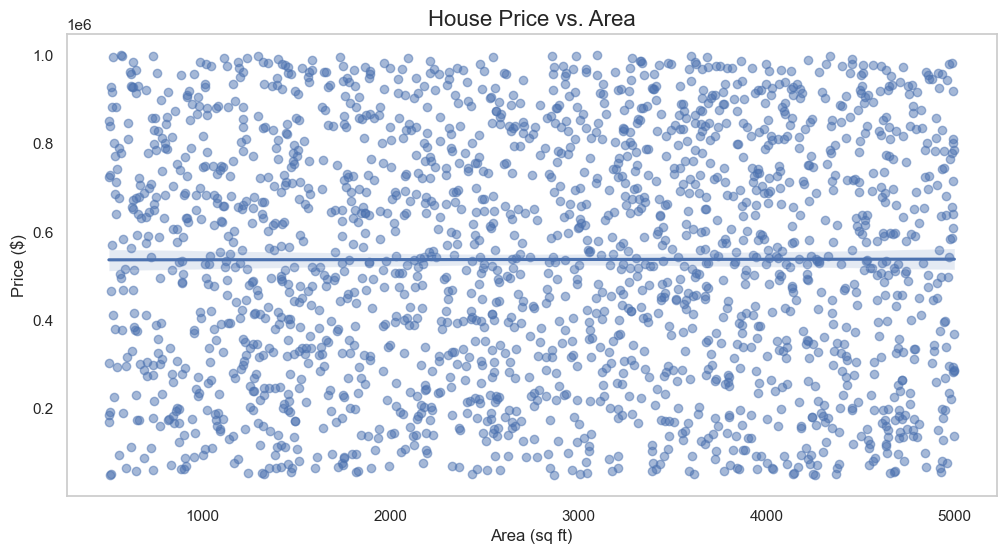

In [ ]:
import matplotlib.pyplot as plt                                                                                                                             
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='Area', y='Price', data=df, scatter_kws={'alpha':0.5})
plt.title('House Price vs. Area', fontsize=16)
plt.xlabel('Area (sq ft)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid()
plt.show()


#####  How does the area of the house affect its price?

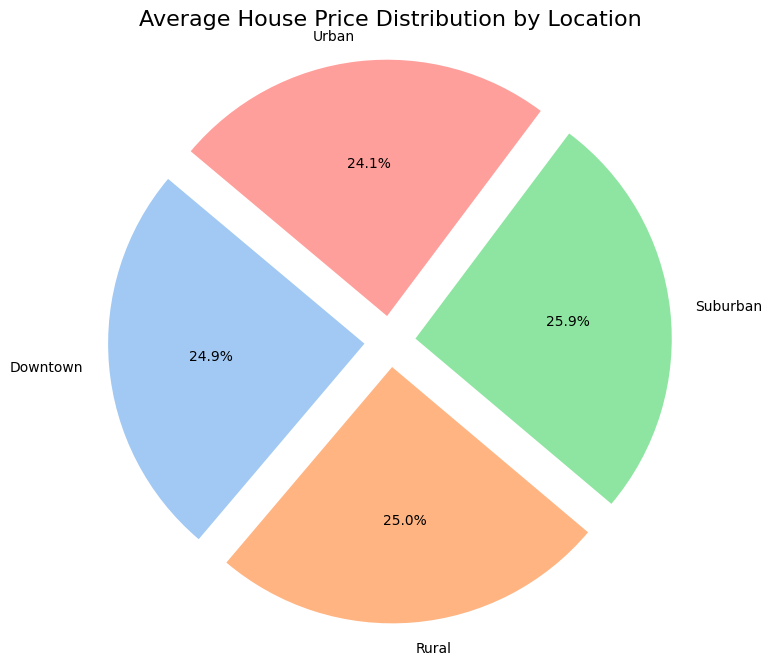

In [19]:
# Calculate the average price for each location
average_prices_by_location = df.groupby('Location')['Price'].mean().reset_index()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_prices_by_location['Price'], 
        labels=average_prices_by_location['Location'], 
        autopct='%1.1f%%', 
        startangle=140,
        colors=sns.color_palette("pastel"),
        explode=[0.1] * len(average_prices_by_location))  # Explode each slice for emphasis

plt.title('Average House Price Distribution by Location', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<!-- Insights -->

Suburban area has houses with highest average price whereas urban area has the lowest average price 

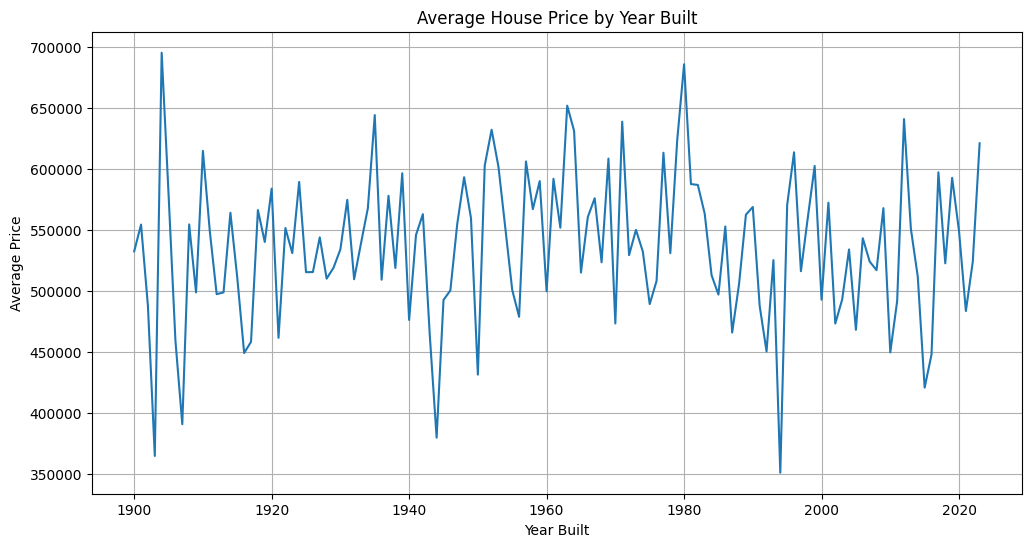

In [21]:
plt.figure(figsize=(12, 6))
year_price_mean = df.groupby('YearBuilt')['Price'].mean()
year_price_mean.plot()
plt.title('Average House Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

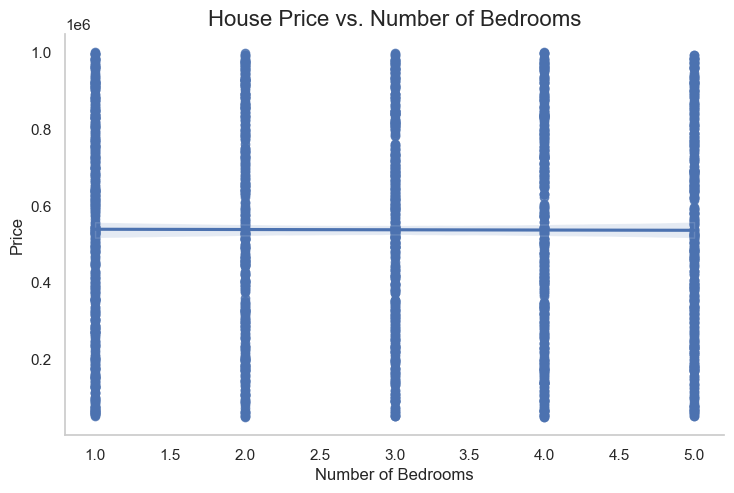

In [25]:
sns.set(style='whitegrid')

# Create a scatter plot with a regression line for Bedrooms vs. Price
plt.figure(figsize=(12, 6))
sns.lmplot(x='Bedrooms', y='Price', data=df, aspect=1.5)
plt.title('House Price vs. Number of Bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid()
plt.show()